## Machine Learning Models in Real-World Business Settings: HR Analytics for Employee Promotion Prediction

### Task 1: Exploratory Data Analysis and Data Preparation
#### Dataset Overview and Data Types Identification

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('Data.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst Few Rows:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

Dataset Shape: (14999, 5)

First Few Rows:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   promotion_last_5years  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        

In [3]:
# Identify data types
print("\n=== DATA TYPES IDENTIFICATION ===")
print("\nColumn Data Types:")
for column in df.columns:
    print(f"{column}: {df[column].dtype}")
    if df[column].dtype == 'object':
        print(f"  Unique values: {df[column].nunique()}")
        print(f"  Sample values: {df[column].unique()[:5]}")


=== DATA TYPES IDENTIFICATION ===

Column Data Types:
satisfaction_level: float64
last_evaluation: float64
number_project: int64
average_montly_hours: int64
promotion_last_5years: int64


#### Data Quality Assessment

In [5]:
# Check for missing values
print("\n=== DATA QUALITY ASSESSMENT ===")
print("\nMissing Values:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing_Count'] > 0])

# Check for duplicates
print(f"\nNumber of Duplicate Rows: {df.duplicated().sum()}")

# Check for outliers in numerical columns
print("\n=== OUTLIER DETECTION ===")
numerical_cols = df[['satisfaction_level', 'last_evaluation',
                     'number_project', 'average_montly_hours']].select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers detected")


=== DATA QUALITY ASSESSMENT ===

Missing Values:
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []

Number of Duplicate Rows: 3113

=== OUTLIER DETECTION ===
satisfaction_level: 0 outliers detected
last_evaluation: 0 outliers detected
number_project: 0 outliers detected
average_montly_hours: 0 outliers detected


#### Target Variable Analysis


=== TARGET VARIABLE ANALYSIS ===

Promotion Distribution:
promotion_last_5years
0    14680
1      319
Name: count, dtype: int64

Promotion Percentage:
promotion_last_5years
0    97.873192
1     2.126808
Name: proportion, dtype: float64


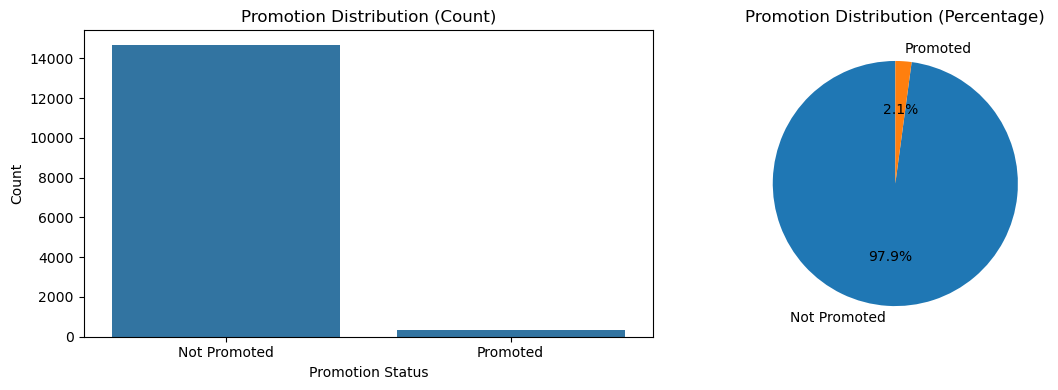


Class Imbalance Ratio: 46.02:1


In [7]:
# Analyze target variable
print("\n=== TARGET VARIABLE ANALYSIS ===")
print("\nPromotion Distribution:")
print(df['promotion_last_5years'].value_counts())
print("\nPromotion Percentage:")
print(df['promotion_last_5years'].value_counts(normalize=True) * 100)

# Visualize target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
sns.countplot(data=df, x='promotion_last_5years', ax=axes[0])
axes[0].set_title('Promotion Distribution (Count)')
axes[0].set_xlabel('Promotion Status')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Not Promoted', 'Promoted'])

# Pie chart
promotion_counts = df['promotion_last_5years'].value_counts()
axes[1].pie(promotion_counts, labels=['Not Promoted', 'Promoted'], 
            autopct='%1.1f%%', startangle=90)
axes[1].set_title('Promotion Distribution (Percentage)')

plt.tight_layout()
plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Check for class imbalance
class_ratio = df['promotion_last_5years'].value_counts()[0] / df['promotion_last_5years'].value_counts()[1]
print(f"\nClass Imbalance Ratio: {class_ratio:.2f}:1")

### Feature Analysis and Visualization


=== FEATURE CORRELATION ANALYSIS ===

Correlation with Target Variable:
promotion_last_5years    1.000000
satisfaction_level       0.025605
average_montly_hours    -0.003544
number_project          -0.006064
last_evaluation         -0.008684
Name: promotion_last_5years, dtype: float64


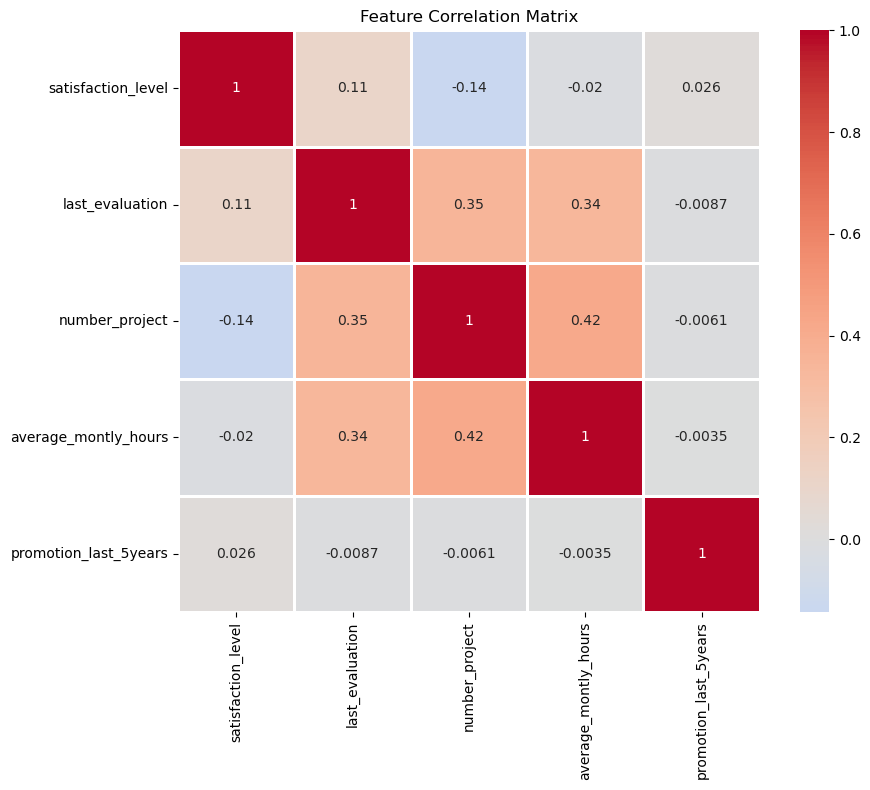

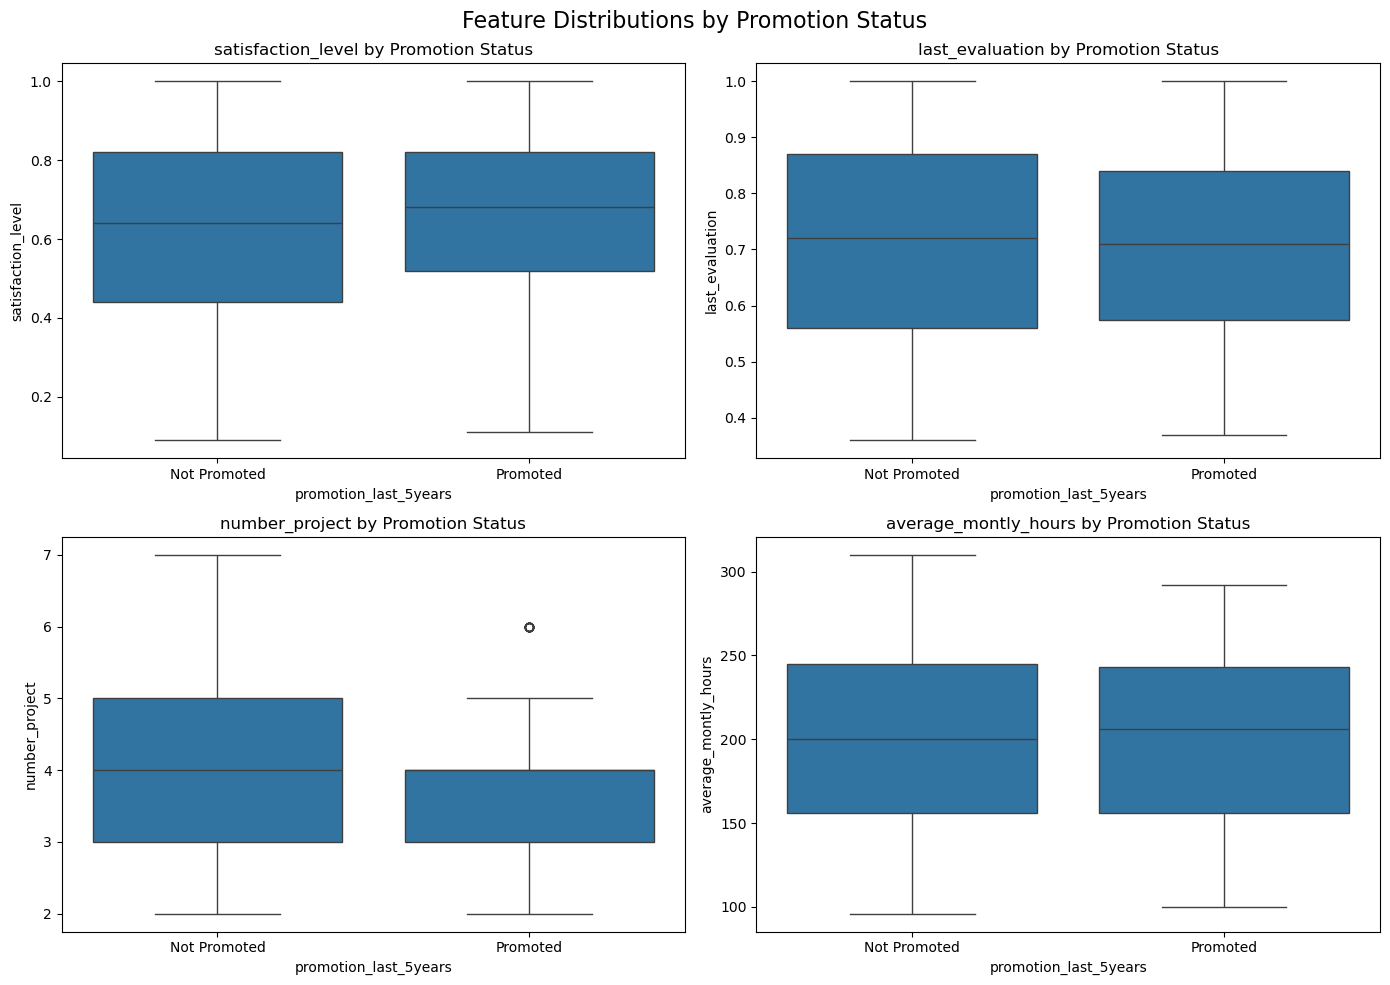

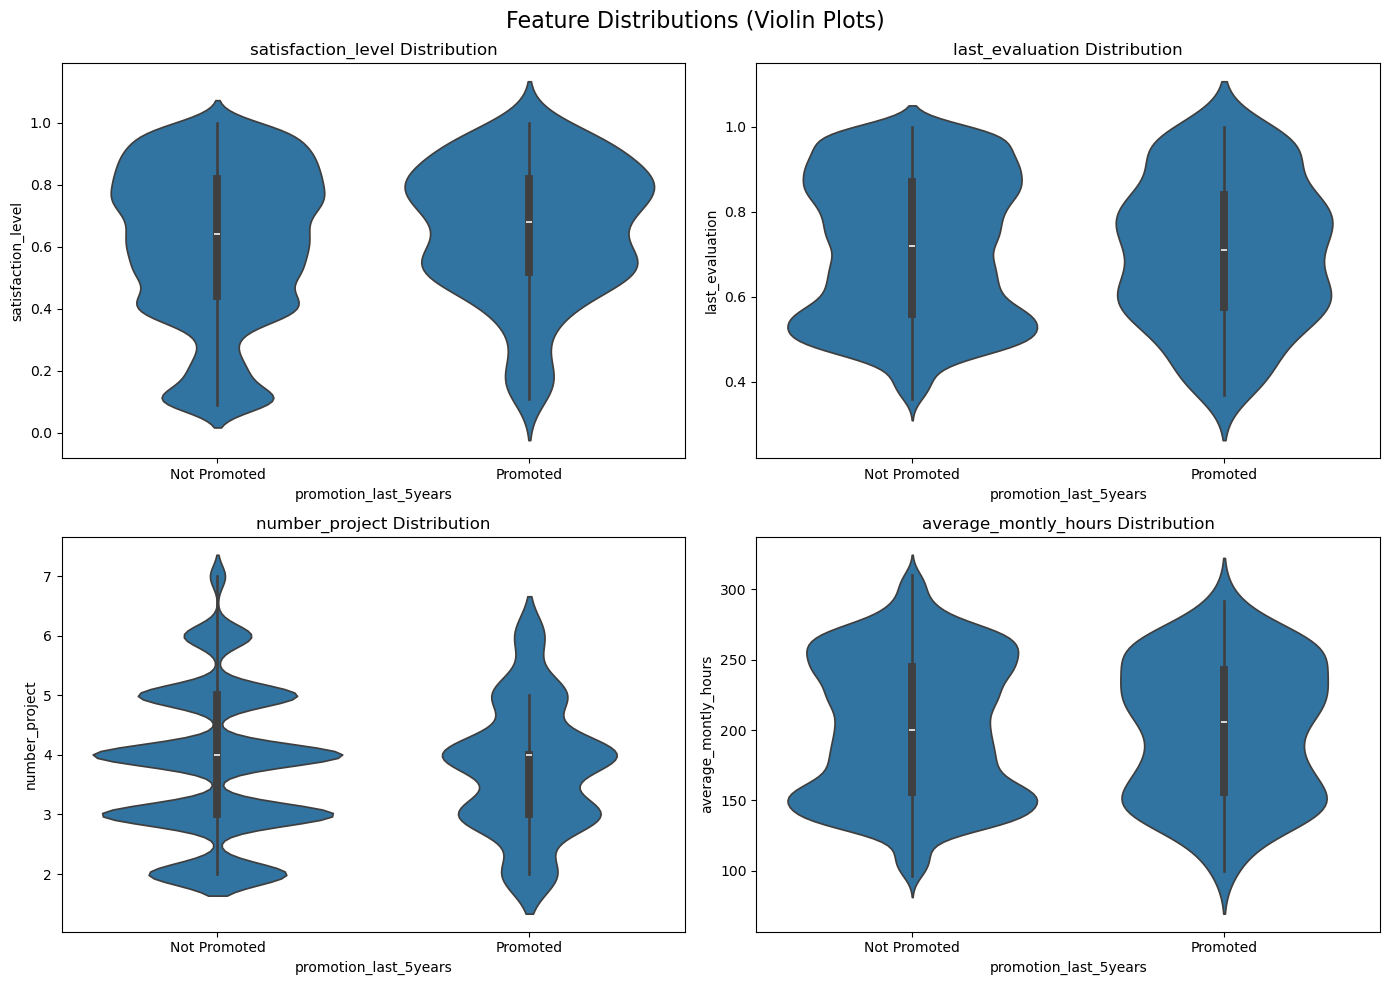

In [8]:
# Select relevant features for analysis
features = ['satisfaction_level', 'last_evaluation', 'number_project', 
            'average_montly_hours', 'promotion_last_5years']
df_analysis = df[features].copy()

print("\n=== FEATURE CORRELATION ANALYSIS ===")
correlation_matrix = df_analysis.corr()
print("\nCorrelation with Target Variable:")
print(correlation_matrix['promotion_last_5years'].sort_values(ascending=False))

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Distribution of features by promotion status
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Feature Distributions by Promotion Status', fontsize=16)

feature_list = ['satisfaction_level', 'last_evaluation', 
                'number_project', 'average_montly_hours']

for idx, feature in enumerate(feature_list):
    row = idx // 2
    col = idx % 2
    
    # Box plot
    sns.boxplot(data=df_analysis, x='promotion_last_5years', 
                y=feature, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} by Promotion Status')
    axes[row, col].set_xticklabels(['Not Promoted', 'Promoted'])

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Violin plots for better distribution understanding
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Feature Distributions (Violin Plots)', fontsize=16)

for idx, feature in enumerate(feature_list):
    row = idx // 2
    col = idx % 2
    
    sns.violinplot(data=df_analysis, x='promotion_last_5years', 
                   y=feature, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} Distribution')
    axes[row, col].set_xticklabels(['Not Promoted', 'Promoted'])

plt.tight_layout()
plt.savefig('violin_plots.png', dpi=300, bbox_inches='tight')
plt.show()

### Data Encoding and Preprocessing

In [11]:
# If there are categorical columns, encode them
if len(categorical_cols) > 0:
    label_encoders = {}
    df_encoded = df.copy()
    
    for col in categorical_cols:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df[col])
        label_encoders[col] = le
        print(f"\nEncoded {col}:")
        print(f"  Original values: {df[col].unique()[:5]}")
        print(f"  Encoded values: {df_encoded[col].unique()[:5]}")
else:
    df_encoded = df.copy()
    print("No categorical variables require encoding.")

# Prepare features and target
X = df_encoded[['satisfaction_level', 'last_evaluation', 
                'number_project', 'average_montly_hours']]
y = df_encoded['promotion_last_5years']

print("\n=== DATA PREPARATION SUMMARY ===")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature names: {list(X.columns)}")

No categorical variables require encoding.

=== DATA PREPARATION SUMMARY ===
Features shape: (14999, 4)
Target shape: (14999,)

Feature names: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours']


###  Feature Scaling

In [13]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("\n=== TRAIN-TEST SPLIT ===")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"\nTraining set promotion distribution:")
print(pd.Series(y_train).value_counts(normalize=True))
print(f"\nTest set promotion distribution:")
print(pd.Series(y_test).value_counts(normalize=True))


=== TRAIN-TEST SPLIT ===
Training set size: 11999 samples
Test set size: 3000 samples

Training set promotion distribution:
promotion_last_5years
0    0.978748
1    0.021252
Name: proportion, dtype: float64

Test set promotion distribution:
promotion_last_5years
0    0.978667
1    0.021333
Name: proportion, dtype: float64


### Task 2: Support Vector Machine (SVM) Classification
#### 2.1 SVM Model Development &  Hyperparameter Tuning

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV

print("\n" + "="*60)
print("TASK 2: SUPPORT VECTOR MACHINE (SVM) CLASSIFICATION & HYPERPARAMETER TUNING")
print("="*60)

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'kernel': ['rbf', 'linear']
}

# Grid search
grid_search = GridSearchCV(SVC(random_state=42, probability=True), 
                          param_grid, cv=5, scoring='roc_auc', 
                          n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

# Train optimized model
svm_optimized = grid_search.best_estimator_
y_pred_svm_opt = svm_optimized.predict(X_test)
y_pred_proba_svm_opt = svm_optimized.predict_proba(X_test)[:, 1]

print("\nOptimized Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_opt):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_svm_opt):.4f}")

print("\nClassification Report (Optimized):")
print(classification_report(y_test, y_pred_svm_opt, 
                          target_names=['Not Promoted', 'Promoted']))


=== HYPERPARAMETER TUNING ===
Fitting 5 folds for each of 40 candidates, totalling 200 fits

Best Parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.6427

Optimized Model Performance:
Accuracy: 0.9787
ROC-AUC Score: 0.7006

Classification Report (Optimized):
              precision    recall  f1-score   support

Not Promoted       0.98      1.00      0.99      2936
    Promoted       0.00      0.00      0.00        64

    accuracy                           0.98      3000
   macro avg       0.49      0.50      0.49      3000
weighted avg       0.96      0.98      0.97      3000



### Model Evaluation Visualization

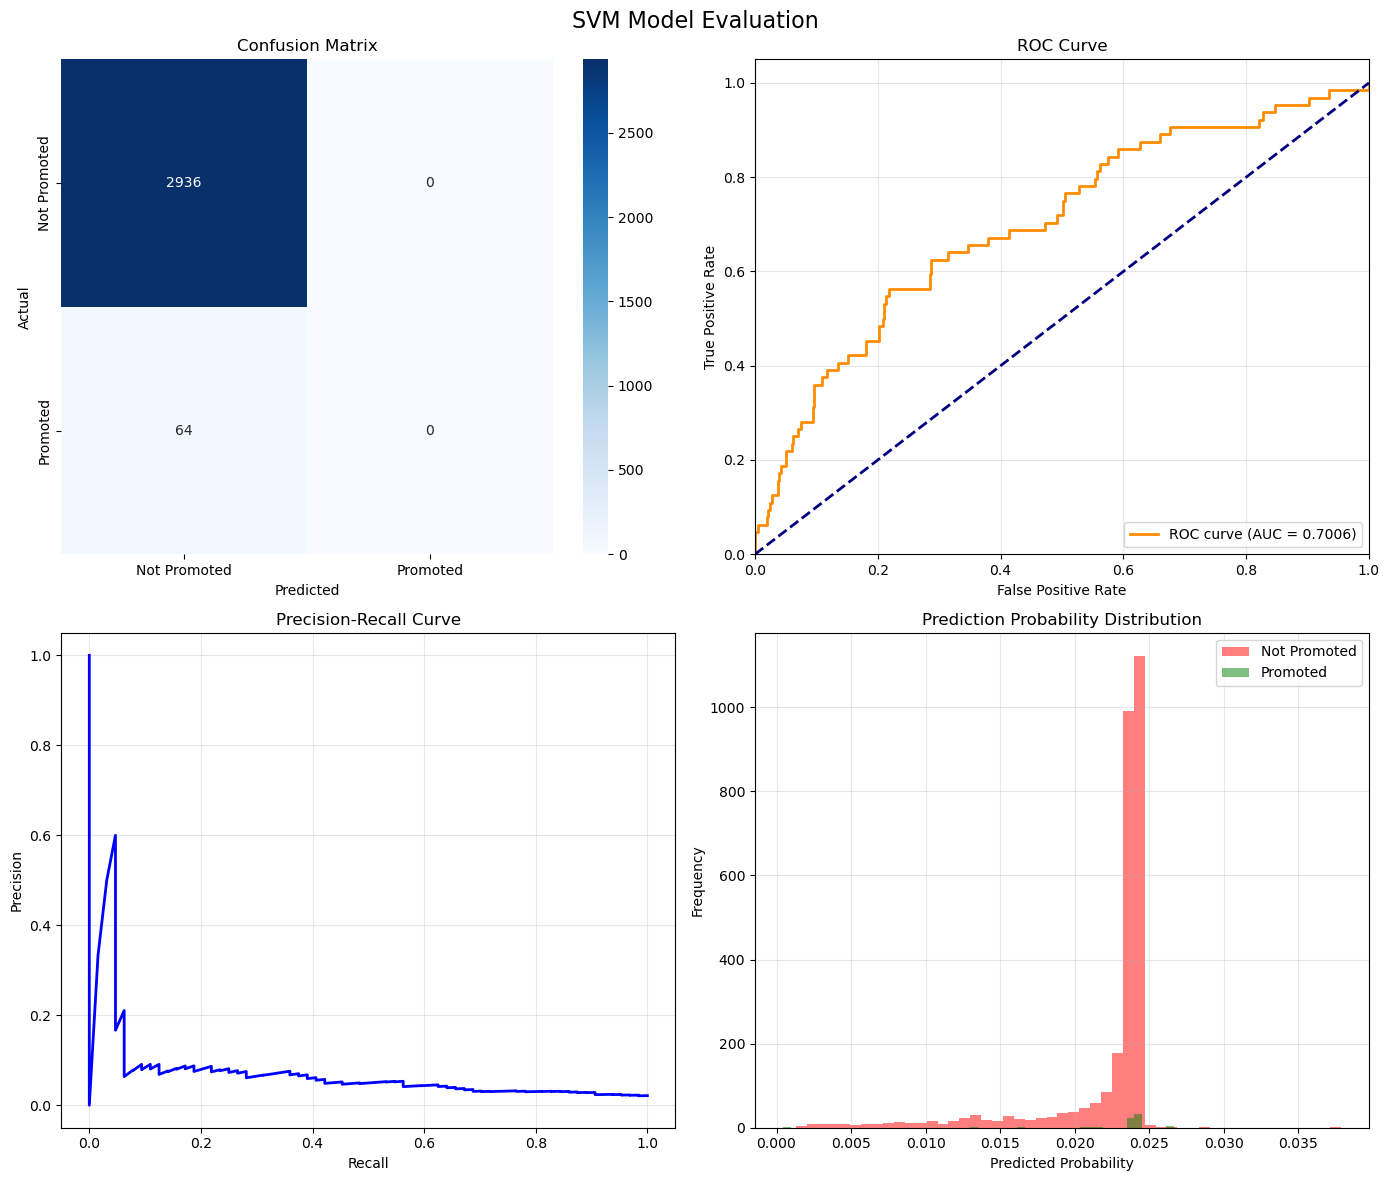

In [16]:
# Create comprehensive evaluation plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('SVM Model Evaluation', fontsize=16)

# Confusion Matrix
cm_svm_opt = confusion_matrix(y_test, y_pred_svm_opt)
sns.heatmap(cm_svm_opt, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])Z
axes[0, 0].set_title('Confusion Matrix')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')
axes[0, 0].set_xticklabels(['Not Promoted', 'Promoted'])
axes[0, 0].set_yticklabels(['Not Promoted', 'Promoted'])

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_svm_opt)
roc_auc = roc_auc_score(y_test, y_pred_proba_svm_opt)
axes[0, 1].plot(fpr, tpr, color='darkorange', lw=2, 
                label=f'ROC curve (AUC = {roc_auc:.4f})')
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve')
axes[0, 1].legend(loc="lower right")
axes[0, 1].grid(True, alpha=0.3)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_svm_opt)
axes[1, 0].plot(recall, precision, color='blue', lw=2)
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision-Recall Curve')
axes[1, 0].grid(True, alpha=0.3)

# Prediction probability distribution
axes[1, 1].hist(y_pred_proba_svm_opt[y_test == 0], bins=50, 
                alpha=0.5, label='Not Promoted', color='red')
axes[1, 1].hist(y_pred_proba_svm_opt[y_test == 1], bins=50, 
                alpha=0.5, label='Promoted', color='green')
axes[1, 1].set_xlabel('Predicted Probability')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Prediction Probability Distribution')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('svm_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

### 3D Visualization of Decision Boundaries


=== 3D VISUALIZATION USING PCA ===
Explained variance ratio: [0.43518535 0.2676733  0.15958188]
Cumulative explained variance: [0.43518535 0.70285865 0.86244053]


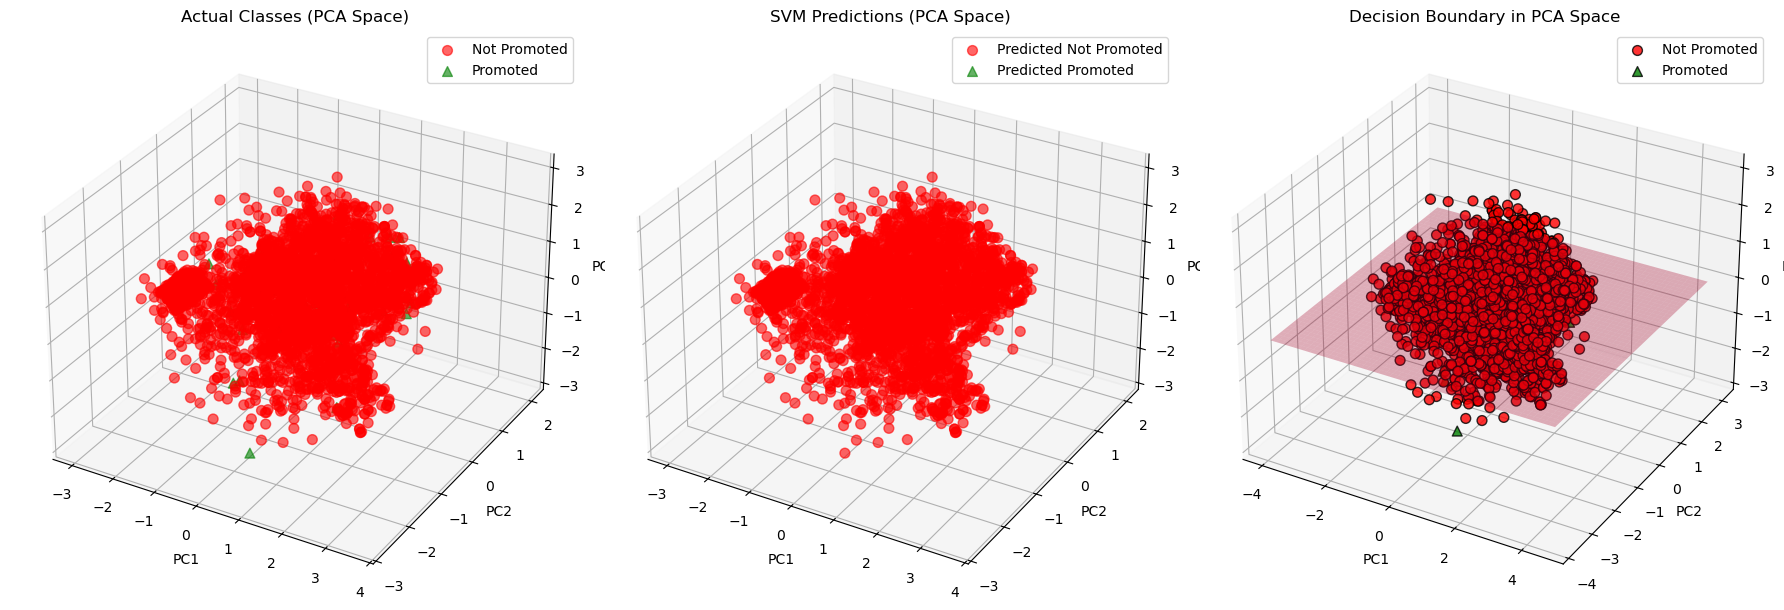


PCA Model Accuracy: 0.9787


In [18]:
# Use PCA to reduce to 3 dimensions for better visualization
print("\n=== 3D VISUALIZATION USING PCA ===")

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Cumulative explained variance: {np.cumsum(pca.explained_variance_ratio_)}")

# Split PCA-transformed data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

# Train SVM on PCA data
svm_pca = SVC(kernel='rbf', C=grid_search.best_params_['C'], 
              gamma=grid_search.best_params_['gamma'], random_state=42)
svm_pca.fit(X_train_pca, y_train_pca)

# Create PCA visualization
fig = plt.figure(figsize=(18, 6))

# Actual classes
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X_test_pca[y_test_pca == 0, 0], 
           X_test_pca[y_test_pca == 0, 1],
           X_test_pca[y_test_pca == 0, 2],
           c='red', marker='o', alpha=0.6, s=50, label='Not Promoted')
ax1.scatter(X_test_pca[y_test_pca == 1, 0], 
           X_test_pca[y_test_pca == 1, 1],
           X_test_pca[y_test_pca == 1, 2],
           c='green', marker='^', alpha=0.6, s=50, label='Promoted')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
ax1.set_title('Actual Classes (PCA Space)')
ax1.legend()

# Predicted classes
ax2 = fig.add_subplot(132, projection='3d')
y_pred_pca = svm_pca.predict(X_test_pca)
ax2.scatter(X_test_pca[y_pred_pca == 0, 0], 
           X_test_pca[y_pred_pca == 0, 1],
           X_test_pca[y_pred_pca == 0, 2],
           c='red', marker='o', alpha=0.6, s=50, label='Predicted Not Promoted')
ax2.scatter(X_test_pca[y_pred_pca == 1, 0], 
           X_test_pca[y_pred_pca == 1, 1],
           X_test_pca[y_pred_pca == 1, 2],
           c='green', marker='^', alpha=0.6, s=50, label='Predicted Promoted')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
ax2.set_title('SVM Predictions (PCA Space)')
ax2.legend()

# Decision boundary
ax3 = fig.add_subplot(133, projection='3d')
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
z_fixed = X_test_pca[:, 2].mean()

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
Z_mesh = np.c_[xx.ravel(), yy.ravel(), np.full(xx.ravel().shape, z_fixed)]
Z = svm_pca.predict(Z_mesh).reshape(xx.shape)

ax3.plot_surface(xx, yy, Z, alpha=0.3, cmap='RdYlGn')
ax3.scatter(X_test_pca[y_test_pca == 0, 0], 
           X_test_pca[y_test_pca == 0, 1],
           X_test_pca[y_test_pca == 0, 2],
           c='red', marker='o', alpha=0.8, s=50, edgecolors='black', 
           label='Not Promoted')
ax3.scatter(X_test_pca[y_test_pca == 1, 0], 
           X_test_pca[y_test_pca == 1, 1],
           X_test_pca[y_test_pca == 1, 2],
           c='green', marker='^', alpha=0.8, s=50, edgecolors='black', 
           label='Promoted')
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')
ax3.set_zlabel('PC3')
ax3.set_title('Decision Boundary in PCA Space')
ax3.legend()

plt.tight_layout()
plt.savefig('svm_pca_3d_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nPCA Model Accuracy: {accuracy_score(y_test_pca, y_pred_pca):.4f}")

## Task 3: Random Forest and XGBoost Implementation
### 3.1 Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

print("\n" + "="*60)
print("TASK 3: RANDOM FOREST AND XGBOOST IMPLEMENTATION")
print("="*60)

print("\n=== RANDOM FOREST CLASSIFIER ===")

# Train initial Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate performance
print("\nInitial Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, 
                          target_names=['Not Promoted', 'Promoted']))

print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)


TASK 3: RANDOM FOREST AND XGBOOST IMPLEMENTATION

=== RANDOM FOREST CLASSIFIER ===

Initial Model Performance:
Accuracy: 0.9907
ROC-AUC Score: 0.7929

Classification Report:
              precision    recall  f1-score   support

Not Promoted       0.99      1.00      1.00      2936
    Promoted       0.95      0.59      0.73        64

    accuracy                           0.99      3000
   macro avg       0.97      0.80      0.86      3000
weighted avg       0.99      0.99      0.99      3000


Confusion Matrix:
[[2934    2]
 [  26   38]]


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Hyperparameter tuning for Random Forest
print("\n=== RANDOM FOREST HYPERPARAMETER TUNING ===")

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                              rf_param_grid, cv=5, scoring='roc_auc', 
                              n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)

print(f"\nBest Parameters: {rf_grid_search.best_params_}")
print(f"Best Cross-Validation Score: {rf_grid_search.best_score_:.4f}")

# Train optimized Random Forest
rf_optimized = rf_grid_search.best_estimator_
y_pred_rf_opt = rf_optimized.predict(X_test)
y_pred_proba_rf_opt = rf_optimized.predict_proba(X_test)[:, 1]

print("\nOptimized Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_opt):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_rf_opt):.4f}")

print("\nClassification Report (Optimized):")
print(classification_report(y_test, y_pred_rf_opt, 
                          target_names=['Not Promoted', 'Promoted']))


=== RANDOM FOREST HYPERPARAMETER TUNING ===
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.7358

Optimized Model Performance:
Accuracy: 0.9890
ROC-AUC Score: 0.8393

Classification Report (Optimized):
              precision    recall  f1-score   support

Not Promoted       0.99      1.00      0.99      2936
    Promoted       0.97      0.50      0.66        64

    accuracy                           0.99      3000
   macro avg       0.98      0.75      0.83      3000
weighted avg       0.99      0.99      0.99      3000



###  Feature Importance Analysis


=== FEATURE IMPORTANCE ANALYSIS ===

Random Forest Feature Importance:
                Feature  Importance
3  average_montly_hours    0.356954
0    satisfaction_level    0.280132
1       last_evaluation    0.272597
2        number_project    0.090318


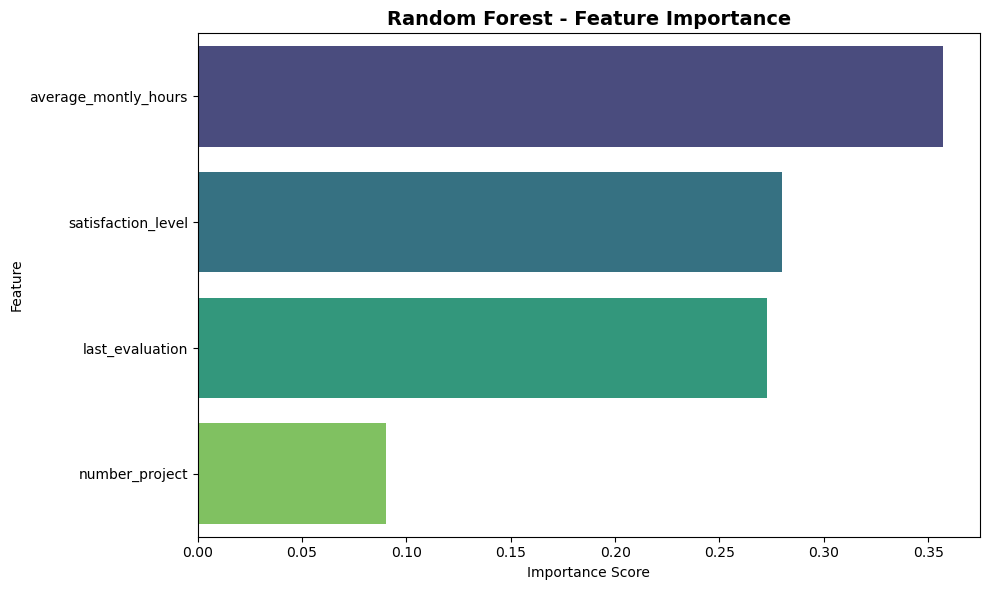

In [22]:
# Feature importance from Random Forest
print("\n=== FEATURE IMPORTANCE ANALYSIS ===")

feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_optimized.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importance_rf)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_rf, x='Importance', y='Feature', palette='viridis')
plt.title('Random Forest - Feature Importance', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('rf_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

### XGBoost Classifier

In [23]:
import xgboost as xgb
from xgboost import XGBClassifier

print("\n=== XGBOOST CLASSIFIER ===")

# Train initial XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate performance
print("\nInitial Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, 
                          target_names=['Not Promoted', 'Promoted']))

print("\nConfusion Matrix:")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)

# Hyperparameter tuning for XGBoost
print("\n=== XGBOOST HYPERPARAMETER TUNING ===")

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_grid_search = GridSearchCV(XGBClassifier(random_state=42, eval_metric='logloss', 
                                             use_label_encoder=False), 
                               xgb_param_grid, cv=5, scoring='roc_auc', 
                               n_jobs=-1, verbose=1)
xgb_grid_search.fit(X_train, y_train)

print(f"\nBest Parameters: {xgb_grid_search.best_params_}")
print(f"Best Cross-Validation Score: {xgb_grid_search.best_score_:.4f}")

# Train optimized XGBoost
xgb_optimized = xgb_grid_search.best_estimator_
y_pred_xgb_opt = xgb_optimized.predict(X_test)
y_pred_proba_xgb_opt = xgb_optimized.predict_proba(X_test)[:, 1]

print("\nOptimized Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_opt):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_xgb_opt):.4f}")

print("\nClassification Report (Optimized):")
print(classification_report(y_test, y_pred_xgb_opt, 
                          target_names=['Not Promoted', 'Promoted']))


=== XGBOOST CLASSIFIER ===

Initial Model Performance:
Accuracy: 0.9793
ROC-AUC Score: 0.7936

Classification Report:
              precision    recall  f1-score   support

Not Promoted       0.98      1.00      0.99      2936
    Promoted       0.67      0.06      0.11        64

    accuracy                           0.98      3000
   macro avg       0.82      0.53      0.55      3000
weighted avg       0.97      0.98      0.97      3000


Confusion Matrix:
[[2934    2]
 [  60    4]]

=== XGBOOST HYPERPARAMETER TUNING ===
Fitting 5 folds for each of 324 candidates, totalling 1620 fits

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1.0}
Best Cross-Validation Score: 0.7137

Optimized Model Performance:
Accuracy: 0.9807
ROC-AUC Score: 0.8131

Classification Report (Optimized):
              precision    recall  f1-score   support

Not Promoted       0.98      1.00      0.99      2936
    Promoted       1.00      0.09

### XGBoost Feature Importance


=== XGBOOST FEATURE IMPORTANCE ===

XGBoost Feature Importance:
                Feature  Importance
0    satisfaction_level    0.271669
1       last_evaluation    0.250954
3  average_montly_hours    0.248395
2        number_project    0.228983


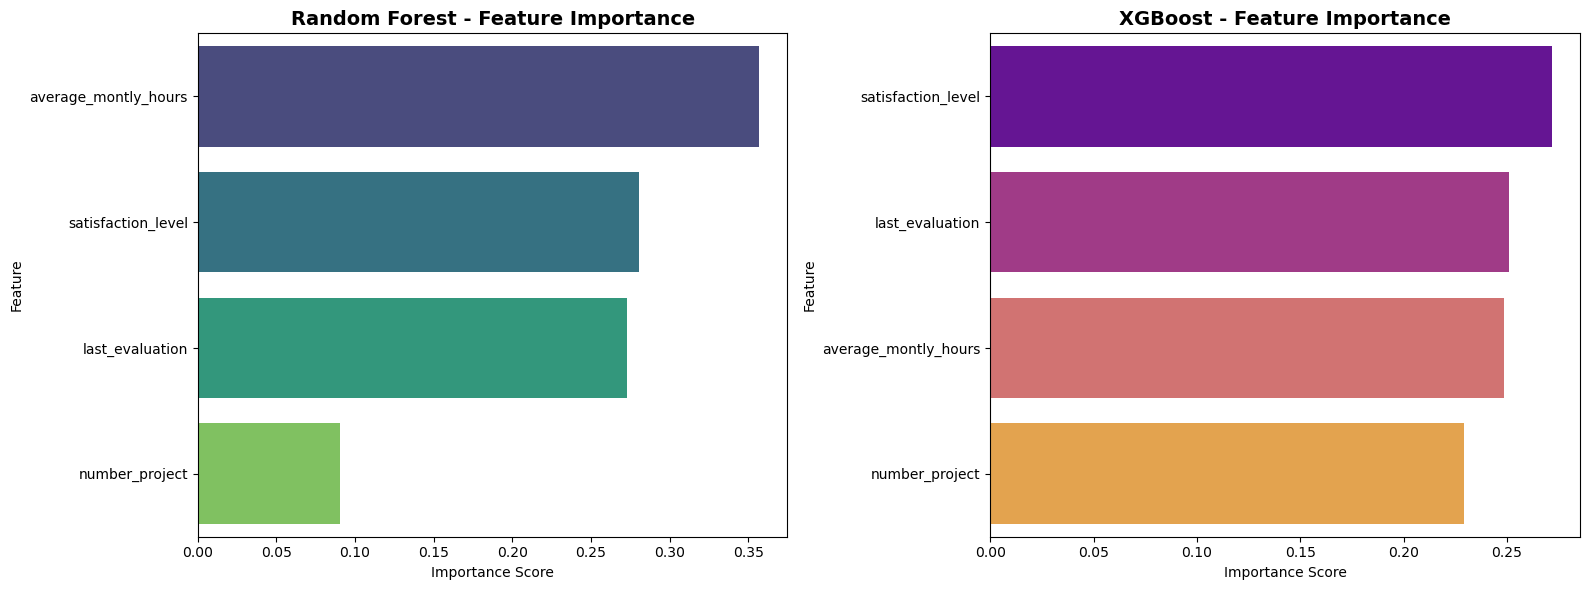

In [25]:
# Feature importance from XGBoost
print("\n=== XGBOOST FEATURE IMPORTANCE ===")

feature_importance_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_optimized.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nXGBoost Feature Importance:")
print(feature_importance_xgb)

# Visualize XGBoost feature importance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Random Forest importance
sns.barplot(data=feature_importance_rf, x='Importance', y='Feature', 
            palette='viridis', ax=axes[0])
axes[0].set_title('Random Forest - Feature Importance', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Importance Score')
axes[0].set_ylabel('Feature')

# XGBoost importance
sns.barplot(data=feature_importance_xgb, x='Importance', y='Feature', 
            palette='plasma', ax=axes[1])
axes[1].set_title('XGBoost - Feature Importance', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Importance Score')
axes[1].set_ylabel('Feature')

plt.tight_layout()
plt.savefig('feature_importance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

### Comprehensive Model Comparison


COMPREHENSIVE MODEL COMPARISON

=== MODEL PERFORMANCE COMPARISON ===
        Model  Accuracy  ROC-AUC  Precision  Recall  F1-Score
          SVM  0.978667 0.700618   0.000000 0.00000  0.000000
Random Forest  0.989000 0.839298   0.969697 0.50000  0.659794
      XGBoost  0.980667 0.813133   1.000000 0.09375  0.171429


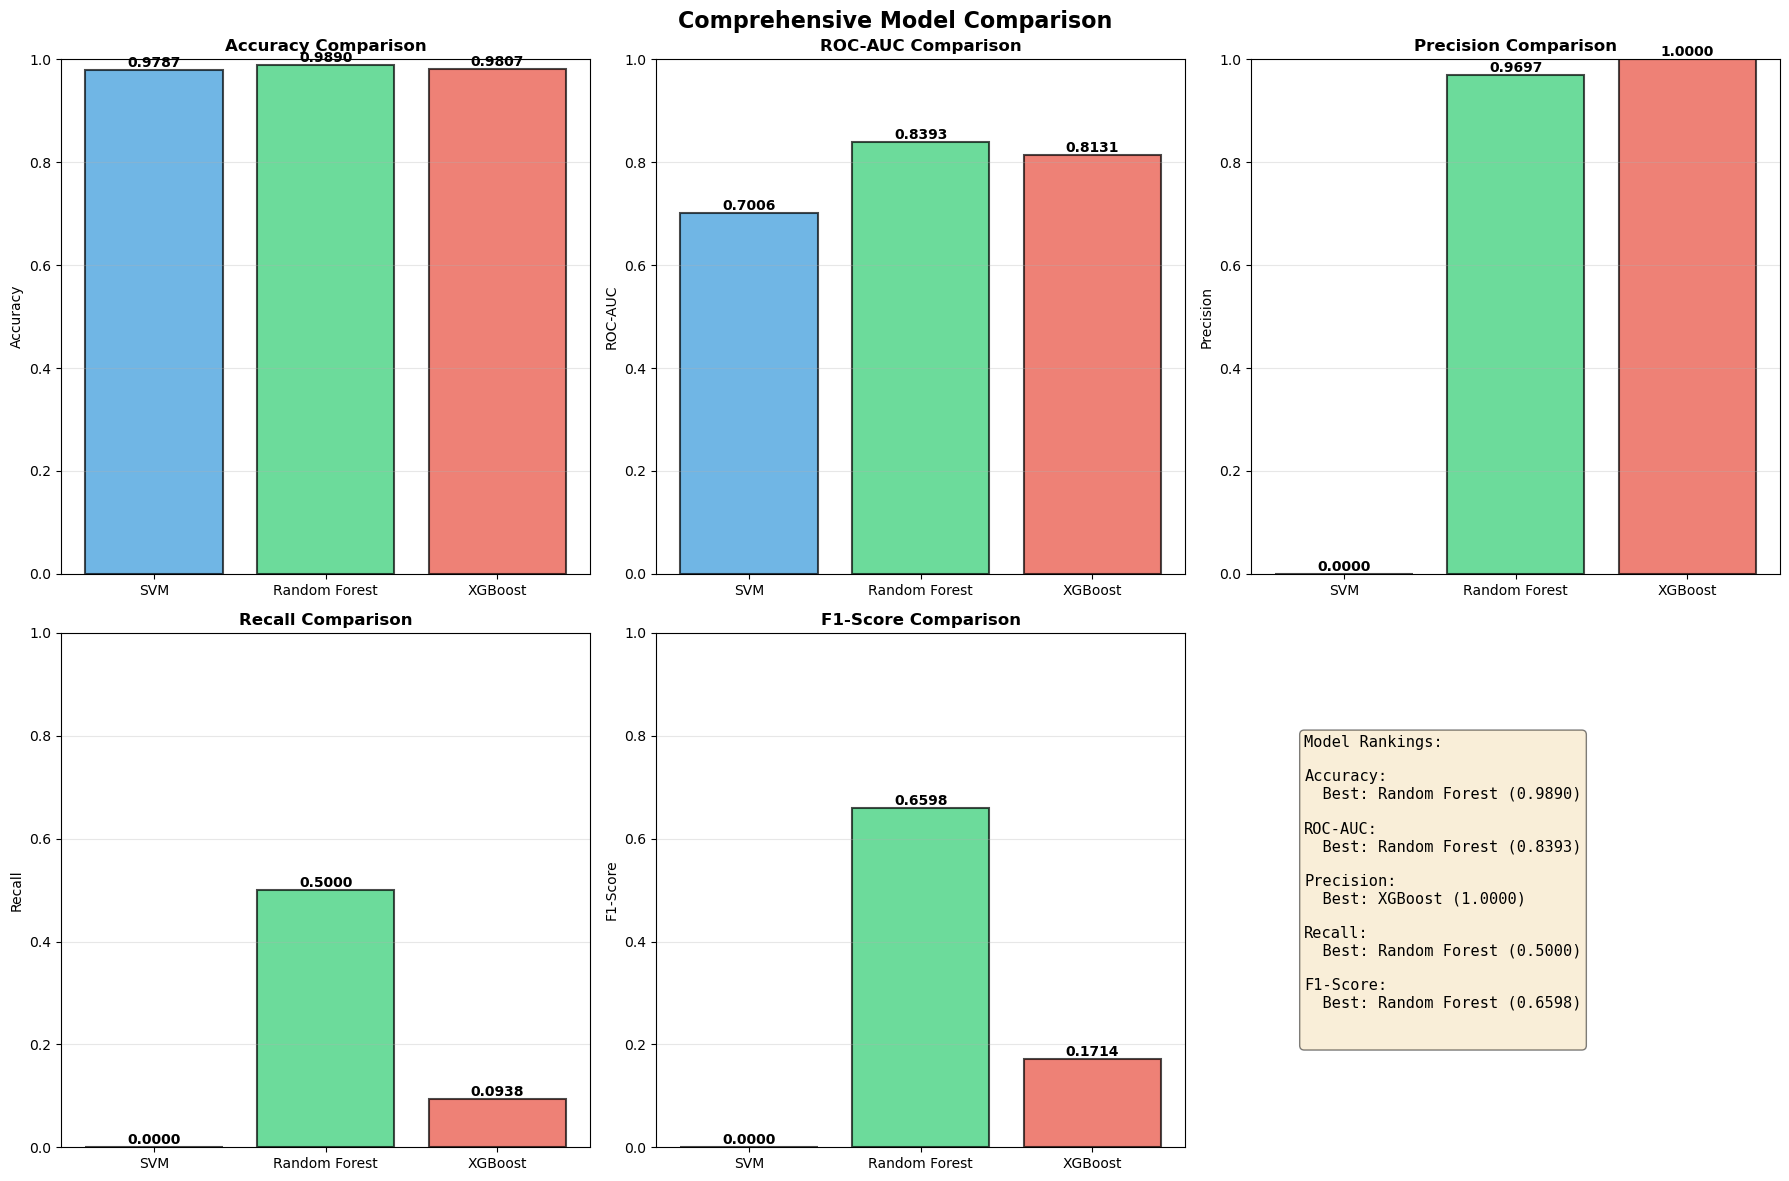

In [26]:
print("\n" + "="*60)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*60)

# Create comparison dataframe
model_comparison = pd.DataFrame({
    'Model': ['SVM', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_svm_opt),
        accuracy_score(y_test, y_pred_rf_opt),
        accuracy_score(y_test, y_pred_xgb_opt)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba_svm_opt),
        roc_auc_score(y_test, y_pred_proba_rf_opt),
        roc_auc_score(y_test, y_pred_proba_xgb_opt)
    ]
})

# Calculate precision, recall, F1-score for each model
from sklearn.metrics import precision_score, recall_score, f1_score

model_comparison['Precision'] = [
    precision_score(y_test, y_pred_svm_opt),
    precision_score(y_test, y_pred_rf_opt),
    precision_score(y_test, y_pred_xgb_opt)
]

model_comparison['Recall'] = [
    recall_score(y_test, y_pred_svm_opt),
    recall_score(y_test, y_pred_rf_opt),
    recall_score(y_test, y_pred_xgb_opt)
]

model_comparison['F1-Score'] = [
    f1_score(y_test, y_pred_svm_opt),
    f1_score(y_test, y_pred_rf_opt),
    f1_score(y_test, y_pred_xgb_opt)
]

print("\n=== MODEL PERFORMANCE COMPARISON ===")
print(model_comparison.to_string(index=False))

# Visualize model comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comprehensive Model Comparison', fontsize=16, fontweight='bold')

metrics = ['Accuracy', 'ROC-AUC', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#2ecc71', '#e74c3c']

for idx, metric in enumerate(metrics):
    row = idx // 3
    col = idx % 3
    
    bars = axes[row, col].bar(model_comparison['Model'], 
                               model_comparison[metric], 
                               color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
    axes[row, col].set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel(metric)
    axes[row, col].set_ylim([0, 1])
    axes[row, col].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.4f}',
                           ha='center', va='bottom', fontsize=10, fontweight='bold')

# Overall comparison - radar chart data
axes[1, 2].axis('off')
summary_text = "Model Rankings:\n\n"
for metric in metrics:
    best_model = model_comparison.loc[model_comparison[metric].idxmax(), 'Model']
    best_score = model_comparison[metric].max()
    summary_text += f"{metric}:\n  Best: {best_model} ({best_score:.4f})\n\n"

axes[1, 2].text(0.1, 0.5, summary_text, fontsize=11, verticalalignment='center',
                family='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

### ROC Curve Comparison

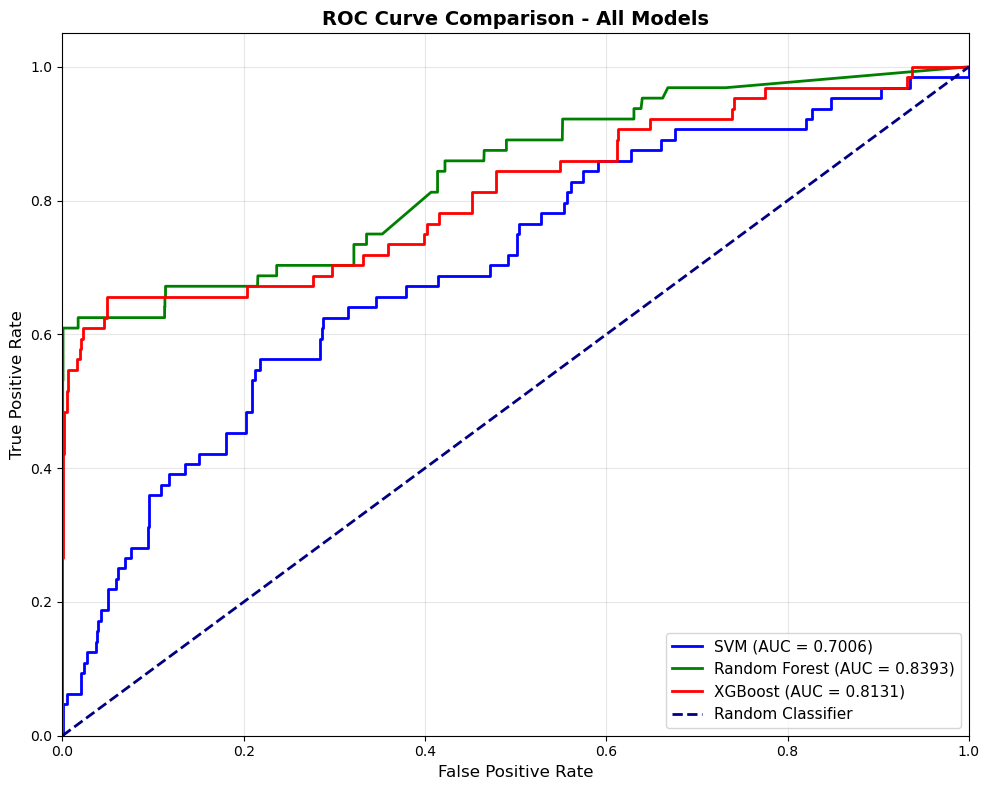

In [27]:
# Compare ROC curves
plt.figure(figsize=(10, 8))

# SVM ROC
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm_opt)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm_opt)
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, 
         label=f'SVM (AUC = {roc_auc_svm:.4f})')

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf_opt)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf_opt)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, 
         label=f'Random Forest (AUC = {roc_auc_rf:.4f})')

# XGBoost ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb_opt)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb_opt)
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, 
         label=f'XGBoost (AUC = {roc_auc_xgb:.4f})')

# Random classifier
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison - All Models', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('roc_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

###  Confusion Matrix Comparison

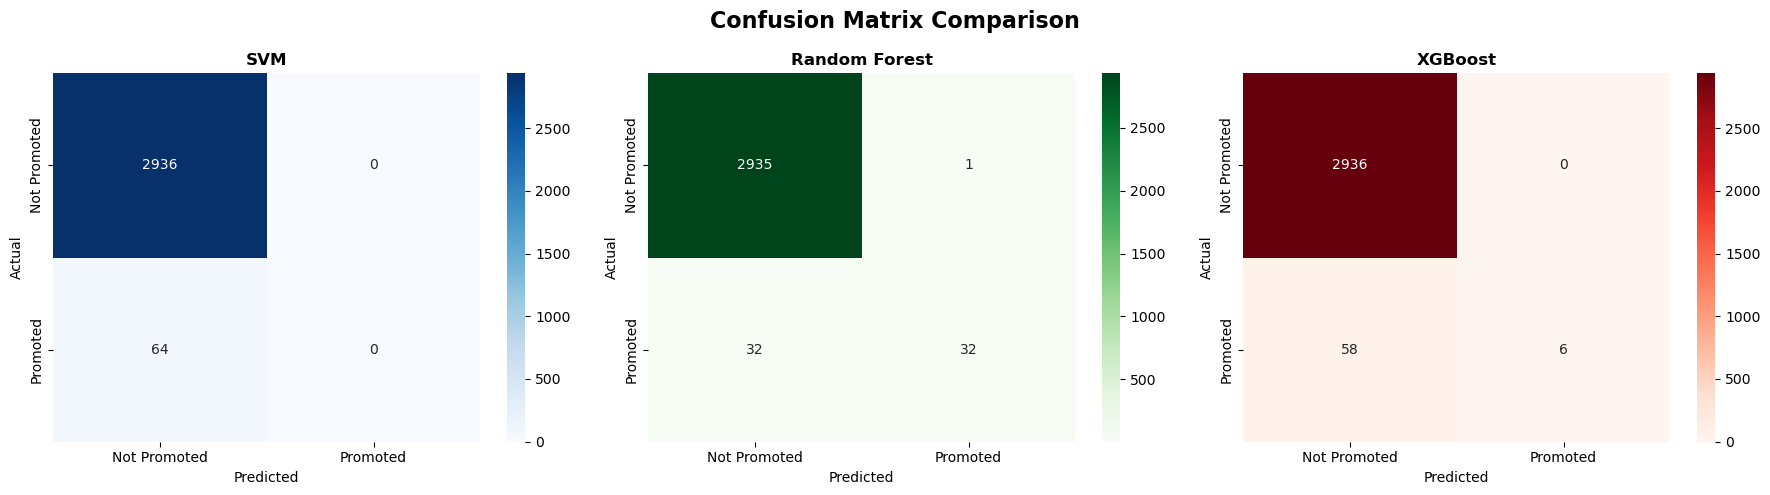

In [28]:
# Compare confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrix Comparison', fontsize=16, fontweight='bold')

# SVM Confusion Matrix
cm_svm_opt = confusion_matrix(y_test, y_pred_svm_opt)
sns.heatmap(cm_svm_opt, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Not Promoted', 'Promoted'],
            yticklabels=['Not Promoted', 'Promoted'])
axes[0].set_title('SVM', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Random Forest Confusion Matrix
cm_rf_opt = confusion_matrix(y_test, y_pred_rf_opt)
sns.heatmap(cm_rf_opt, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Not Promoted', 'Promoted'],
            yticklabels=['Not Promoted', 'Promoted'])
axes[1].set_title('Random Forest', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# XGBoost Confusion Matrix
cm_xgb_opt = confusion_matrix(y_test, y_pred_xgb_opt)
sns.heatmap(cm_xgb_opt, annot=True, fmt='d', cmap='Reds', ax=axes[2],
            xticklabels=['Not Promoted', 'Promoted'],
            yticklabels=['Not Promoted', 'Promoted'])
axes[2].set_title('XGBoost', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.savefig('confusion_matrix_comparison.png', dpi=300, bbox_inches='tight')
plt.show()